### Выбор локации для скважины

Допустим, вы работаете в нефтедобывающей компании. Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль.

### Загрузка и подготовка данных

In [1]:
import pandas as pd # импорт библиотеки pandas
import numpy as np # импорт библиотеки numpy
from sklearn.linear_model import LinearRegression # импорт из библиотеки sklearn алгоритма линейной регрессии
from sklearn.model_selection import train_test_split # импорт из библиотеки sklearn функции разделения выборок
from sklearn.metrics import mean_squared_error # импорт из библиотеки sklearn функции метрики средней квадратичной ошибки
import matplotlib.pyplot as plt # импорт из библиотеки matplotlib функции построения графиков

In [2]:
# прочитаем файлы
df_1 = pd.read_csv('geo_data_0.csv')
df_2 = pd.read_csv('geo_data_1.csv')
df_3 = pd.read_csv('geo_data_2.csv')

- id — уникальный идентификатор скважины;
- f0, f1, f2 — три признака точек;
- product — объём запасов в скважине (тыс. баррелей).

In [3]:
# посмотрим на данные
display(df_1.head())
display(df_1.info())
display(df_2.head())
display(df_2.info())
display(df_3.head())
display(df_3.info())

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Пропусков в данных нет.

In [4]:
# проверю на уникальные значения
display(df_1.nunique())
display(df_2.nunique())
display(df_3.nunique())

id          99990
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

id          99996
f0         100000
f1         100000
f2         100000
product        12
dtype: int64

id          99996
f0         100000
f1         100000
f2         100000
product    100000
dtype: int64

Возникли вопросы по значениям в id, скорее всего дубли скважин

А также странные значения в product - 2 регион

In [5]:
# проверю уникальные значения в 'id'
df_1['id'].value_counts()

fiKDv    2
QcMuo    2
AGS9W    2
Tdehs    2
74z30    2
        ..
x8osI    1
gZ7tR    1
Zw8hj    1
zcrQO    1
1CWhH    1
Name: id, Length: 99990, dtype: int64

In [6]:
df_1[df_1['id'] == 'Tdehs'].head()

,id,f0,f1,f2,product
21426,Tdehs,0.829407,0.298807,-0.049563,96.035308
75715,Tdehs,0.112079,0.430296,3.218993,60.964018


Наименование одно, а данные другие.

In [7]:
# удалим столбец с уникальным номер скаважины, так как он не нужен для работы модели
df_1, df_2, df_3 = \
    df_1.drop('id', axis = 1), df_2.drop('id', axis = 1), df_3.drop('id', axis = 1)

Т.к. объём запасов в скважине измеряется в тыс. баррелей, то, пожалуй, округлю и уберу все значения после запятой.

In [8]:
df_1['product'].value_counts()

105.280062    1
122.799517    1
61.817308     1
37.155071     1
73.090084     1
             ..
154.694803    1
79.818082     1
138.609486    1
62.540393     1
149.633246    1
Name: product, Length: 100000, dtype: int64

In [9]:
df_1['product'] = df_1['product'].round(0).astype('Int64')
df_2['product'] = df_2['product'].round(0).astype('Int64')
df_3['product'] = df_3['product'].round(0).astype('Int64')

In [10]:
df_2['product'].value_counts().sort_index()

0      8235
3      8337
27     8468
30     8306
54     8472
57     8390
81     8320
84     8431
108    8201
111    8303
135    8304
138    8233
Name: product, dtype: Int64

Очень странное распределение во втором регионе. 
<br>Могу сделать предположение, что данную категорию поделили на 12 выборок по примерно равным объемам. 

Попробовал выделить визуально группы. 8 групп в принципе четко выделяется в других 2 регионах.

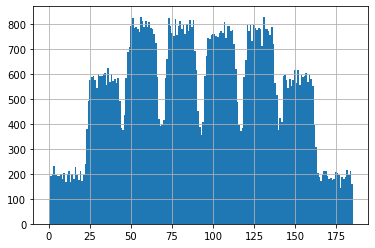

In [11]:
df_1['product'].hist(bins=186);

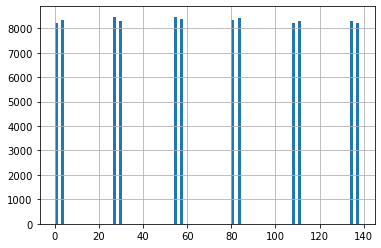

In [12]:
df_2['product'].hist(bins=100);

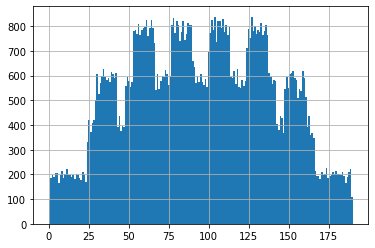

In [13]:
df_3['product'].hist(bins=191);

- На **графике взаимосявязи scatter** признаки **f2 и целевой признак**, явно имеют линейную взаимосвязь о корелируют.
- Такое ощущение, что все признаки для региона 2 были изменены, для возможно какого то улучшения данных.
- Выбросов нет.
- Так как проект учебный, мы не можем уточнить данную информацию.

In [14]:
def show_me_scatter(df, a, b):
    '''
    функция для построения графика scatter
    
    '''
    plt.scatter(df.columns.values[a], df.columns.values[b], data=df)
    plt.xlabel('f2')
    plt.ylabel('product')
    plt.title('Взаимосвязь с целевым признаком')
    plt.show()

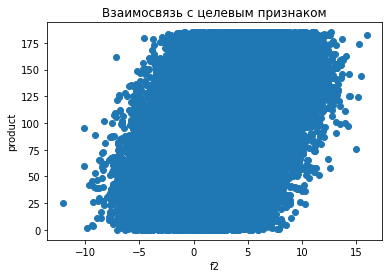

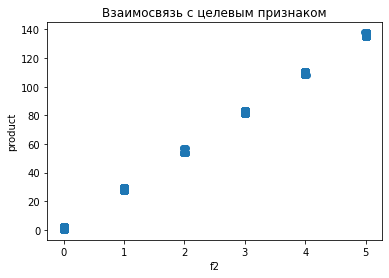

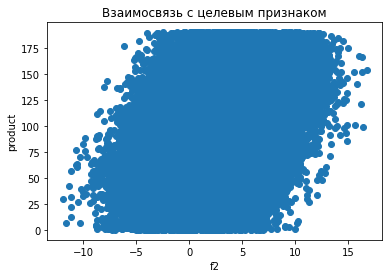

In [15]:
show_me_scatter(df_1, 2, 3)
show_me_scatter(df_2, 2, 3)
show_me_scatter(df_3, 2, 3)

В регионе 1 наблюдается отрицательная корреляция f0 и f1, также интересные корреляции -+ наблюдаются и с целевым признаком.

In [16]:
df_1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143572
f1,-0.440723,1.000000,0.001724,-0.192375
f2,-0.003153,0.001724,1.000000,0.483661
product,0.143572,-0.192375,0.483661,1.000000


У региона 2 предельная кореляция product с f2

In [17]:
df_2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.028828
f1,0.182287,1.000000,-0.002595,-0.009716
f2,-0.001777,-0.002595,1.000000,0.999464
product,-0.028828,-0.009716,0.999464,1.000000


У 3 региона значимая корреляция присутствует только целевого признака product и f2

In [18]:
df_3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001997
f1,0.000528,1.000000,0.000779,-0.000997
f2,-0.000448,0.000779,1.000000,0.445853
product,-0.001997,-0.000997,0.445853,1.000000


##### Посмотрим на статистические данные

In [19]:
display(df_1.describe())
display(df_2.describe())
display(df_3.describe())

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500620
std,0.871832,0.504433,3.248248,44.289494
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.000000
50%,0.502360,0.250252,2.515969,92.000000
75%,1.073581,0.700646,4.715088,129.000000
max,2.362331,1.343769,16.003790,185.000000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.00000
mean,1.141296,-4.796579,2.494541,68.85204
std,8.965932,5.119872,1.703572,46.02096
min,-31.609576,-26.358598,-0.018144,0.00000
25%,-6.298551,-8.267985,1.000021,27.00000
50%,1.153055,-4.813172,2.011479,57.00000
75%,8.621015,-1.332816,3.999904,108.00000
max,29.421755,18.734063,5.019721,138.00000


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,94.998580
std,1.732045,1.730417,3.473445,44.751123
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.000000
50%,0.009424,-0.009482,2.484236,95.000000
75%,1.158535,1.163678,4.858794,131.000000
max,7.238262,7.844801,16.739402,190.000000


##### Посмотрим все это дело еще визуально.

In [20]:
import seaborn as sns

В 1 регионе хорошее нормальное распределение в f2

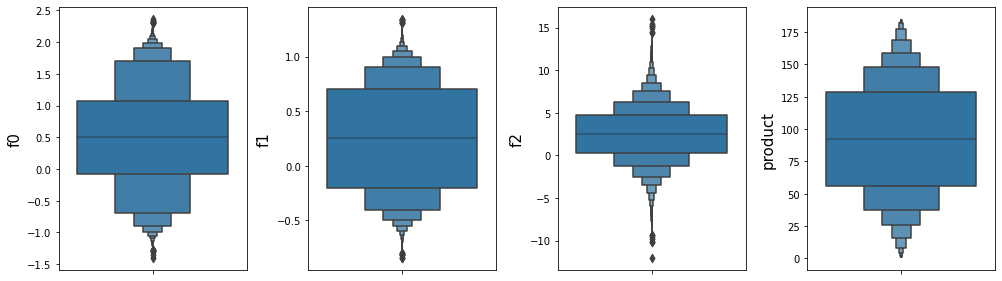

In [21]:
fig = plt.figure(figsize=(14,4))
for index, feature in enumerate(df_1):
    plt.subplot(1,4,index+1)
    sns.boxenplot(y=feature, data=df_1)
    plt.ylabel('{}'.format(feature), size=15, labelpad=5) 
fig.tight_layout(pad=1.0)

В регионе 2 явно f2 и product, приводились к чему то общему, распределение ненормальное. 
<br>В f0, и f1 вполне себе нормальное распределение.

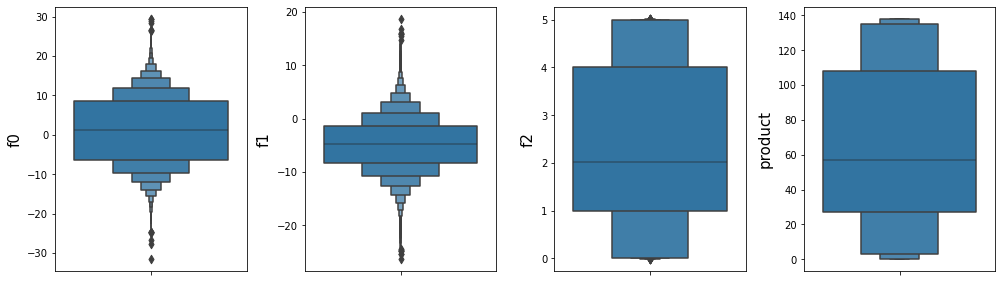

In [22]:
fig = plt.figure(figsize=(14,4))
for index, feature in enumerate(df_2):
    plt.subplot(1,4,index+1)
    sns.boxenplot(y=feature, data=df_2)
    plt.ylabel('{}'.format(feature), size=15, labelpad=5) 
fig.tight_layout(pad=1.0)

Можно обратить внимание, что самые красивые графики в регионе 3, данные как то распределены равномерно. 
<br>Что говорит о хороших нормальных распределениях во всех признаках.
<br>Я бы взял его на заметку.
<br>Единственное присутствуют явно выраженные выбросы, в отличие от предыдущих регионов.

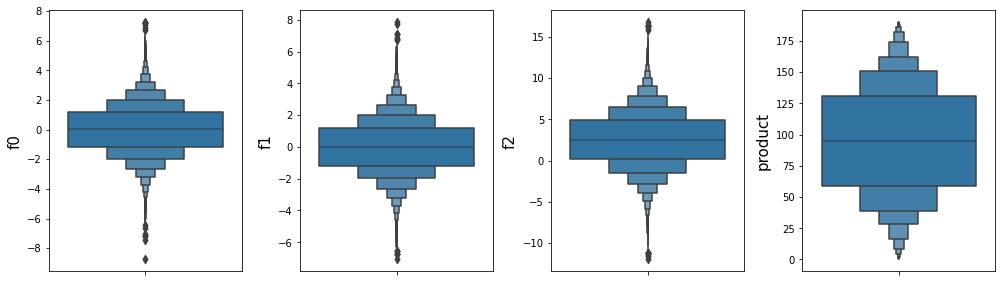

In [23]:
fig = plt.figure(figsize=(14,4))
for index, feature in enumerate(df_3):
    plt.subplot(1,4,index+1)
    sns.boxenplot(y=feature, data=df_3)
    plt.ylabel('{}'.format(feature), size=15, labelpad=5) 
fig.tight_layout(pad=1.0)

##### Непонятно конечно, что делать с выбросами в признаках f0, f1, f2. 
##### Т к про них нет никаких данных, что это и зачем, чтобы понять картину их устройства.
##### В признаке product, в этом плане все хорошо.

In [24]:
# поиск дубликатов
display(df_1.duplicated().sum())
display(df_2.duplicated().sum())
display(df_3.duplicated().sum())

0

0

0

### Вывод

- Регион 1 - среднее и медианы почти равны.
- Регион 2 - среднее выше, чем медиана, значит больше скважин с большими значениями. Значения запасов меньше, чем в регионе 1 и 3. Очень странное распределение, 6 групп с близкими парами. 
- Регион 3 - данные почти такие же как в регионе 1. Хорошие нормальные распределения, но выбросы во всех независимых признаках. 
<br>
<br>
- Самое интересное, чистка выбросов даже под корень, не улучшает и не ухудшает результаты в принципе.

### Обучение и проверка модели

У нас три региона, напишем функцию, которая вернет квадратный корень из среднеквадратичной ошибки, предсказания и правильные ответы на валидационной выборке.

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
def predictions(geo):
    # разделим данные на признаки и целевой признак
    features = geo.drop(['product'], axis= 1)
    target = geo['product']
    # разобьем данные на обучающую и валидационную выборки в соотношении 75:25
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, train_size = 0.75, random_state = 42)
    
    # обучим модель градиентного бустинга
    model =  GradientBoostingRegressor(n_estimators=300,  max_depth=5)
    model.fit(features_train, target_train)
    # сохраним предсказания для валидационной выборки и RMSE
    predicted_valid = model.predict(features_valid)
    RMSE = mean_squared_error(target_valid, predicted_valid)**0.5
    # преобразуем предсказания в Series
    predicted_valid = pd.Series(predicted_valid)
    # сравняем индексы значений
    predicted_valid.index = target_valid.index
    # возвращаем RMSE, предсказания и правильные ответы
    return RMSE, predicted_valid, target_valid 

С помощью функции найдем RMSE, средний запас предсказанного сырья и средний запас настоящего сырья.

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
RMSE_1, predicted_valid_1, target_valid_1 = predictions(df_1)
print(f'''Для региона 1: 
    Средний запас предсказанного сырья: {predicted_valid_1.mean():.2f} тыс. баррелей, 
    Средний запас настоящего сырья: {target_valid_1.mean():.2f} тыс. баррелей,
    RMSE: {RMSE_1:.3f}''')

Для региона 1: 
    Средний запас предсказанного сырья: 92.47 тыс. баррелей, 
    Средний запас настоящего сырья: 92.33 тыс. баррелей,
    RMSE: 37.366


In [29]:
df_1['product'].mean()

92.50062

In [30]:
RMSE_2, predicted_valid_2, target_valid_2 = predictions(df_2)
print(f'''Для региона 2: 
    Средний запас предсказанного сырья: {predicted_valid_2.mean():.2f} тыс. баррелей, 
    Средний запас настоящего сырья: {target_valid_2.mean():.2f} тыс. баррелей,
    RMSE: {RMSE_2:.3f}''')

Для региона 2: 
    Средний запас предсказанного сырья: 68.74 тыс. баррелей, 
    Средний запас настоящего сырья: 68.75 тыс. баррелей,
    RMSE: 0.673


In [31]:
df_2['product'].mean()

68.85204

In [32]:
RMSE_3, predicted_valid_3, target_valid_3 = predictions(df_3)
print(f'''Для региона 3: 
    Средний запас предсказанного сырья: {predicted_valid_3.mean():.2f} тыс. баррелей, 
    Средний запас настоящего сырья: {target_valid_3.mean():.2f} тыс. баррелей,
    RMSE: {RMSE_3:.3f}''')

Для региона 3: 
    Средний запас предсказанного сырья: 94.75 тыс. баррелей, 
    Средний запас настоящего сырья: 95.15 тыс. баррелей,
    RMSE: 37.733


In [33]:
df_3['product'].mean()

94.99858

### Выводы

- Для региона 2 практически нет ошибок, что неудивительно, учитывая как сгруппирован целевой признак.
- В регионе 2 меньше всего средний объем сырья.
- Регион 1 и 3 обладает большим запасом по сырью, по сравнению с первым регионом. Но и RMSE значительно больше.

### Подготовка к расчёту прибыли

- При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
- Бюджет на разработку скважин в регионе — 10 млрд рублей.
- При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
- После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

#### Все ключевые значения для расчётов сохраним в отдельных переменных

In [34]:
BUDGET = 10_000_000_000 # бюджет
SPOTS = 500 # 500 точек для исследования
BEST_SPOTS = 200 # 200 лучших точек для разработки
INCOME = 450_000 # доход с каждой единицы продукта

### Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины

In [35]:
print(f'Для безубыточной разработки {SPOTS} скважин нужно получить в среднем по \
{BUDGET/INCOME/BEST_SPOTS:.2f} тыс. баррелей с каждой из 200 лучших точек.')

Для безубыточной разработки 500 скважин нужно получить в среднем по 111.11 тыс. баррелей с каждой из 200 лучших точек.


#### Выводы

- Средний запас сырья по всем трем регионам не удовлетворяет среднему значению по безубыточной разработке 500 точек.
- Нужно правильно выбрать регион и лучшие точки с учетом рисков, чтобы компенсировать расходы на разработку.

### Напишем функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели

In [36]:
def profit(predicted_valid, target_valid):
    # выбор 200 лучших скважин с максимальными значениями предсказаний
    top_200 = predicted_valid.sort_values(ascending=False).head(BEST_SPOTS).index
    # прибыль c полученного объёма сырья
    profit = (target_valid.loc[top_200].sum()*INCOME)-BUDGET
    return profit

У 1 и 3 региона по идее самая лучшая прибыль c полученного объёма сырья должна быть.

In [37]:
top_200 = predicted_valid_1.sort_values(ascending=False).head(BEST_SPOTS).index
(target_valid_1.loc[top_200].sum()*INCOME)-BUDGET

3557150000

In [38]:
top_200 = predicted_valid_2.sort_values(ascending=False).head(BEST_SPOTS).index
(target_valid_2.loc[top_200].sum()*INCOME)-BUDGET

2420000000

In [39]:
top_200 = predicted_valid_3.sort_values(ascending=False).head(BEST_SPOTS).index
(target_valid_3.loc[top_200].sum()*INCOME)-BUDGET

3460400000

### Расчёт прибыли и рисков

#### Применим технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли

Напишем функцию, которая возвращает риск убытков, прибыль и 95%-й доверительный интервал.

In [40]:
def revenue(predicted_valid, target_valid):
    state = np.random.RandomState(23)
    values = []
    # применим bootstrap
    for i in range(1000):
        target_subsample = predicted_valid.sample(n = SPOTS, replace=True, random_state=state)
        values.append(profit(target_subsample, target_valid))
    values = pd.Series(values)
    # находим 95%-й доверительный интервал
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    # считаем риск убытков
    risk = (values < 0).mean()*100
    return risk, values, lower, upper

In [41]:
risk, values, lower, upper = revenue(predicted_valid_1, target_valid_1)
print(f'''Для региона 1:  
    95%-й доверительный интервал: {lower/1_000_000:.2f} : {upper/1_000_000:.2f} млн. рублей,
    Средняя прибыль: {values.mean()/1_000_000:.2f} млн. рублей,
    Риск убытков: {risk:.1f} %''')

Для региона 1:  
    95%-й доверительный интервал: -73.94 : 927.18 млн. рублей,
    Средняя прибыль: 430.10 млн. рублей,
    Риск убытков: 4.8 %


In [42]:
risk, values, lower, upper = revenue(predicted_valid_2, target_valid_2)
print(f'''Для региона 2:  
    95%-й доверительный интервал: {lower/1_000_000:.2f} : {upper/1_000_000:.2f} млн. рублей,
    Средняя прибыль: {values.mean()/1_000_000:.2f} млн. рублей,
    Риск убытков: {risk:.1f} %''')

Для региона 2:  
    95%-й доверительный интервал: 60.17 : 893.52 млн. рублей,
    Средняя прибыль: 462.64 млн. рублей,
    Риск убытков: 1.1 %


In [43]:
risk, values, lower, upper = revenue(predicted_valid_3, target_valid_3)
print(f'''Для региона 3:  
    95%-й доверительный интервал: {lower/1_000_000:.2f} : {upper/1_000_000:.2f} млн. рублей,
    Средняя прибыль: {values.mean()/1_000_000:.2f} млн. рублей,
    Риск убытков: {risk:.1f} %''')

Для региона 3:  
    95%-й доверительный интервал: 156.00 : 1193.31 млн. рублей,
    Средняя прибыль: 694.72 млн. рублей,
    Риск убытков: 0.2 %


### Выводы

##### 3 регион в лидерах по прибыли и безубыточности.

- Риск убытков для региона составлет 0.2 %, что укладывается в заданные границы в 2.5%.
---
- В регионе максимальная средняя прибыль в 694.67 млн. рублей.
---
---
- RMSE = 37.732
<br>Здесь надо отметить, что у 2 региона значительно ниже значения. Я думаю здесь хорошо бы разобраться с данными 2 региона, каким образом они так сформированы. Данные у 3 региона самые лучшие по распределениям, хотя и с выбросами. Здесь бы тоже уточнить, про независимые признаки, какая у них роль.
---
---
- На основании выше перечисленных пунктов, **можно сделать вывод, что лучшим регионом для разработки является 3 регион**. За неимением, больших данных.

---
---